## Part 2 - Handling with Missing Values
The second part is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.

In [378]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings("ignore")

In [379]:
df_origin = pd.read_json("scout_car.json", lines=True)

In [380]:
df_clean = pd.read_csv("auto_scout_clean.csv")

In [381]:
df = df_clean.copy()

In [382]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price(€),15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,NaN,NaN
km,56013.0,80000.0,83450.0,73000.0,16200.0
hp(kw),66.0,141.0,85.0,66.0,66.0
type,Used,Used,Used,Used,Used
previous_owners,2.0,NaN,1.0,1.0,1.0
inspection_new,Yes,NaN,NaN,NaN,Yes
warranty(month),NaN,NaN,NaN,NaN,NaN


##### 1 - make_model column

In [383]:
df["make_model"].value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [384]:
# There is no null value.

##### 2- body_type column

In [385]:
df["short_description"] = df_origin["short_description"]

In [386]:
df["body_type"].value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [387]:
df[df["body_type"].isnull()]["make_model"].unique()

array(['Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Espace'], dtype=object)

In [388]:
for makemodel in list(df["make_model"].unique()):
    condition = df["make_model"] == makemodel
    mode = list(df[condition]["body_type"].mode())
    if mode != []:
        df.loc[condition, "body_type"] = df.loc[condition, "body_type"].fillna(df[condition]["body_type"].mode()[0])
    else:
        df.loc[condition, "body_type"] = df.loc[condition, "body_type"].fillna(df["body_type"].mode()[0])

In [389]:
df["make_model"].value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

##### 3- price(€) column

In [390]:
df["price(€)"].isnull().sum()

0

In [391]:
# There is no null value.

##### 4- vat column

In [392]:
df["vat"].value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [393]:
df.groupby(["make_model"])["vat"].describe()

,count,unique,top,freq
make_model,,,,
Audi A1,1855,2,VAT deductible,1774
Audi A2,1,1,VAT deductible,1
Audi A3,2310,2,VAT deductible,2209
Opel Astra,1873,2,VAT deductible,1828
Opel Corsa,1648,2,VAT deductible,1607
Opel Insignia,2030,2,VAT deductible,1980
Renault Clio,1058,2,VAT deductible,984
Renault Duster,16,1,VAT deductible,16
Renault Espace,615,2,VAT deductible,581


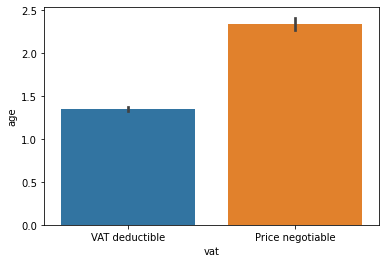

In [394]:
sns.barplot(data=df, x="vat", y="age");

In [395]:
df.groupby("age")["vat"].describe()

,count,unique,top,freq
age,,,,
0.0,2377,2,VAT deductible,2372
1.0,3594,2,VAT deductible,3533
2.0,1871,2,VAT deductible,1727
3.0,2236,2,VAT deductible,2020


<AxesSubplot:xlabel='vat', ylabel='price(€)'>

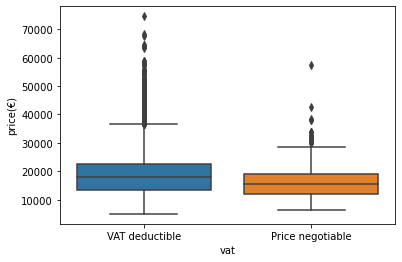

In [396]:
sns.boxplot(data=df, x="vat", y="price(€)")

In [397]:
df.groupby("vat")["price(€)"].mean()

vat
Price negotiable    16097.152582
VAT deductible      18708.520128
Name: price(€), dtype: float64

In [398]:
df.columns

Index(['make_model', 'body_type', 'price(€)', 'vat', 'km', 'hp(kw)', 'type',
       'previous_owners', 'inspection_new', 'warranty(month)', 'paint_type',
       'num_of_door', 'num_of_seat', 'gearing_type', 'displacement(cc)',
       'cylinders', 'weight(kg)', 'drive_chain', 'fuel', 'co2_emission(g/km)',
       'emission_class', 'comfort_and_convenience', 'entertaintment_and_media',
       'extras', 'safety_and_security', 'gears', 'age', 'upholstery_style',
       'upholstery_color', 'consumption_comb(100km/l)',
       'consumption_city(100km/l)', 'consumption_country(100km/l)',
       'short_description'],
      dtype='object')

In [399]:
df.groupby(["make_model", "age","type"])["vat"].describe()

count unique             top freq
make_model     age type                                            
Audi A1        0.0 Demonstration    106      1  VAT deductible  106
                   Employee's car    40      1  VAT deductible   40
                   New                9      1  VAT deductible    9
                   Pre-registered   111      1  VAT deductible  111
                   Used             111      1  VAT deductible  111
...                                 ...    ...             ...  ...
Renault Espace 2.0 Employee's car     5      1  VAT deductible    5
                   Pre-registered     1      1  VAT deductible    1
                   Used              60      2  VAT deductible   53
               3.0 Employee's car     1      1  VAT deductible    1
                   Used             164      2  VAT deductible  142

[110 rows x 4 columns]

In [400]:
for makemodel in df["make_model"].unique():
    for age in df["age"].unique():
        for typ in df["type"].unique():
            condition = (df["make_model"] == makemodel) & (df["age"] == age) & (df["type"] == typ)
            df.loc[condition, "vat"] = df.loc[condition, "vat"].fillna(method="ffill").fillna(method="bfill")
            
df["vat"] = df["vat"].fillna(method="ffill").fillna(method="bfill")

In [401]:
df["vat"].isnull().sum()

0

##### 5- km column

In [402]:
df["km"].value_counts(dropna=False)

10.0       1045
NaN        1024
1.0         367
5.0         170
50.0        148
           ... 
67469.0       1
43197.0       1
10027.0       1
35882.0       1
57.0          1
Name: km, Length: 6690, dtype: int64

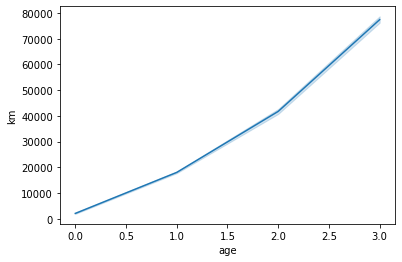

In [403]:
sns.lineplot(data=df, x= "age", y="km");

In [404]:
df.groupby("age")["km"].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
0.0,2706.0,2085.355137,5365.880693,1.0,10.00,50.0,3000.0,127022.0
1.0,4484.0,18035.239072,11052.524314,1.0,9990.00,17872.0,25078.5,136000.0
2.0,3272.0,41754.940709,28295.747886,1.0,21541.75,34752.0,54805.5,317000.0
3.0,3674.0,77442.520958,39170.142977,10.0,48000.00,72914.5,99950.0,291800.0


In [405]:
for age in df[df["km"].isnull()]["age"].values:
    if age == 0.0:
        df.loc[df["km"].isnull(), "km"] = df.loc[df["km"].isnull(), "km"].fillna(1833.26)
    elif age == 1.0:
        df.loc[df["km"].isnull(), "km"] = df.loc[df["km"].isnull(), "km"].fillna(18035.23)
    elif age == 2.0:
        df.loc[df["km"].isnull(), "km"] = df.loc[df["km"].isnull(), "km"].fillna(41754.94)
    else:
        df.loc[df["km"].isnull(), "km"] = df.loc[df["km"].isnull(), "km"].fillna(77442.52)

In [406]:
df["km"].isnull().sum()

0

###### 6- hp_kw column

In [407]:
df["hp(kw)"].isnull().sum()

88

In [408]:
df[df["hp(kw)"].isnull()][["make_model", "short_description"]]

,make_model,short_description
1269,Audi A1,ADRENALIN 1.6 TDI 85KW (116CV) SPORTBACK
2500,Audi A1,"Sportback 25 TFSI UPE 24.394,99 EUR"
4259,Audi A3,DESIGN EDITION 1.6 TDI 85KW SPORTBACK
7177,Opel Astra,Edition 120Y 1.4T A6 150pk s&s
7670,Opel Astra,1.4 Turbo 150pk Start/Stop Aut Online Edition
8269,Opel Corsa,Cosmo 5d 1.4 A6 90pk
10167,Opel Corsa,EU NEUWAGEN - PREISHIT - versch. Modelle !
10586,Opel Insignia,INSIGNA SPORTS TOURER 1.6 DIESEL 136 ELITE BVA
10909,Opel Insignia,ST 1.4 TURBO ECOFLEX GLP SELECTIVE
10910,Opel Insignia,ST 1.4 TURBO ECOFLEX GLP SELECTIVE


In [409]:
df.groupby(["make_model", "body_type"])["hp(kw)"].describe()

count        mean        std    min     25%  \
make_model     body_type                                                     
Audi A1        Compact        1037.0   77.091610  12.616649   60.0   70.00   
               Coupe             2.0   77.500000  10.606602   70.0   73.75   
               Other            13.0   80.384615  19.839096   60.0   70.00   
               Sedans         1538.0   76.322497  12.308178   60.0   66.00   
               Station wagon    21.0   75.142857  13.799586   60.0   66.00   
               Van               1.0  147.000000        NaN  147.0  147.00   
Audi A2        Off-Road          1.0   85.000000        NaN   85.0   85.00   
Audi A3        Compact         181.0   89.972376  18.863967   81.0   81.00   
               Convertible       8.0  124.250000  44.345236   81.0  110.00   
               Coupe             4.0   82.000000   2.000000   81.0   81.00   
               Other            16.0   88.187500  10.980096   81.0   81.00   
               Sedans         2605.0   90.077159  20.246555    9.0   81.00   
               Station wagon   282.0   90.680851  16.353009   81.0   85.00   
Opel Astra     Compact         184.0   87.885870  15.852566   66.0   81.00   
               Coupe             2.0  106.500000   4.949747  103.0  104.75   
               Off-Road          1.0  110.000000        NaN  110.0  110.00   
               Other            67.0   86.402985   9.579112   67.0   81.00   
               Sedans         1052.0   90.344106  17.851577    1.0   77.00   
               Station wagon  1218.0   95.688834  16.284021    1.0   81.00   
Opel Corsa     Compact        1231.0   61.696182   6.981530   40.0   51.00   
               Coupe            13.0   59.461538  10.445217   51.0   51.00   
               Off-Road          3.0   68.666667   4.618802   66.0   66.00   
               Other            87.0   65.678161   3.189715   51.0   66.00   
               Sedans          874.0   57.731121   8.836806    1.0   51.00   
               Transporter       7.0   54.428571   4.276180   51.0   51.00   
               Van               2.0   51.000000   0.000000   51.0   51.00   
Opel Insignia  Compact          27.0  119.851852  18.804058  100.0  100.00   
               Coupe             1.0   81.000000        NaN   81.0   81.00   
               Off-Road          7.0  132.000000  13.228757  122.0  125.00   
               Other            47.0  103.893617  10.467827   88.0  100.00   
               Sedans          894.0  110.968680  16.691024   81.0  100.00   
               Station wagon  1611.0  116.393544  17.496095    1.0  100.00   
               Van               1.0  121.000000        NaN  121.0  121.00   
Renault Clio   Compact         476.0   71.922269  25.340881    4.0   55.00   
               Coupe             1.0  147.000000        NaN  147.0  147.00   
               Off-Road          2.0   71.000000  22.627417   55.0   63.00   
               Other            51.0   68.803922  15.221064   54.0   56.00   
               Sedans          913.0   74.156627  34.667383   53.0   55.00   
               Station wagon   336.0   64.482143  11.504949   53.0   54.00   
               Transporter      29.0   57.379310   4.143961   54.0   55.00   
               Van               2.0   55.000000   0.000000   55.0   55.00   
Renault Duster Off-Road         26.0   77.153846   0.784465   77.0   77.00   
Renault Espace Compact           6.0  135.666667  20.096434  118.0  118.25   
               Coupe             2.0  141.500000  33.234019  118.0  129.75   
               Off-Road          8.0  118.000000   0.000000  118.0  118.00   
               Other             7.0  128.714286  19.353848  117.0  118.00   
               Sedans           21.0  114.761905  42.372048    1.0  118.00   
               Station wagon    91.0  130.527473  19.980179   96.0  118.00   
               Transporter      52.0  116.711538  10.686874   96.0  118.00   
               Van             770.0  131.780519  21.

In [410]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        condition = (df["make_model"] == makemodel) & (df["body_type"] == bodytype)
        median = df[condition]["hp(kw)"].median()    
        df.loc[condition, "hp(kw)"] = df.loc[condition, "hp(kw)"].fillna(median)   

In [411]:
df["hp(kw)"].isnull().sum()

0

##### 7- type column

In [412]:
df["type"].value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

In [413]:
df[df["type"].isnull()]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,warranty(month),paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l),consumption_city(100km/l),consumption_country(100km/l),short_description
2765,Audi A3,Sedans,17900,VAT deductible,115137.00,110.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0,Automatic,1968.0,4.0,NaN,front,Diesel,118.0,Euro 6,Air conditioning,"Bluetooth,Hands-free equipment","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Driver-side airbag,Isofi...",6.0,3.0,Cloth,Other,4.5,5.3,4.1,SPB 2.0 TDI S tronic Sport
5237,Audi A3,Sedans,25400,VAT deductible,77442.52,85.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0,Automatic,1598.0,4.0,NaN,front,Diesel,103.0,Euro 6,Air conditioning,"Bluetooth,Hands-free equipment",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Isofi...",7.0,NaN,Cloth,Other,3.9,4.1,3.7,SPB 1.6 TDI 116 CV S tronic


In [414]:
df.groupby("make_model")["type"].value_counts()

make_model      type          
Audi A1         Used              1808
                New                328
                Employee's car     197
                Pre-registered     146
                Demonstration      135
Audi A2         Employee's car       1
Audi A3         Used              2179
                New                326
                Pre-registered     300
                Employee's car     228
                Demonstration       62
Opel Astra      Used              1829
                New                255
                Demonstration      165
                Employee's car     152
                Pre-registered     125
Opel Corsa      Used              1461
                Pre-registered     365
                New                155
                Employee's car     149
                Demonstration       89
Opel Insignia   Used              1840
                New                369
                Demonstration      172
                Employee's car   

In [415]:
df[df["make_model"] == "Audi A3"]["type"].mode()[0]

'Used'

In [416]:
df["type"].fillna(df[df["make_model"] == "Audi A3"]["type"].mode()[0], inplace=True)

In [417]:
df["type"].isnull().sum()

0

##### 8- previous_owners column

In [418]:
df["previous_owners"].value_counts(dropna=False, normalize=True)

1.0    0.521013
NaN    0.417112
2.0    0.048872
0.0    0.011810
3.0    0.001068
4.0    0.000126
Name: previous_owners, dtype: float64

In [419]:
age_prevowners_freq = pd.crosstab(df["age"], df["previous_owners"])

In [420]:
age_prevowners_freq

previous_owners,0.0,1.0,2.0,3.0,4.0
age,,,,,
0.0,2,1569,10,0,0
1.0,8,2967,75,0,0
2.0,6,1711,296,7,1
3.0,10,2026,397,10,1


In [421]:
chi2, pval, dof, expected = stats.chi2_contingency(age_prevowners_freq)

In [422]:
chi2
# age and previous_owners variables appear to be associated.

579.4702438414428

In [423]:
for age in df["age"].unique():
    df.loc[df["age"]==age, "previous_owners"] = \
    df.loc[df["age"]==age, "previous_owners"].fillna(method="ffill").fillna(method="bfill")

df["previous_owners"] = df["previous_owners"].fillna(method="ffill").fillna(method="bfill")

In [424]:
df["previous_owners"].value_counts(dropna=False, normalize=True)

1.0    0.903951
2.0    0.074125
0.0    0.019976
3.0    0.001822
4.0    0.000126
Name: previous_owners, dtype: float64

##### 9- inspection_new column

In [425]:
df["inspection_new"].value_counts(dropna=False, normalize=True)

NaN    0.753
Yes    0.247
Name: inspection_new, dtype: float64

In [426]:
df["inspection_new"].value_counts(dropna=False)

NaN    11987
Yes     3932
Name: inspection_new, dtype: int64

In [427]:
df["inspection_new"] = df["inspection_new"].fillna("No")

In [428]:
df["inspection_new"].isnull().sum()

0

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   make_model                    15919 non-null  object 
 1   body_type                     15919 non-null  object 
 2   price(€)                      15919 non-null  int64  
 3   vat                           15919 non-null  object 
 4   km                            15919 non-null  float64
 5   hp(kw)                        15919 non-null  float64
 6   type                          15919 non-null  object 
 7   previous_owners               15919 non-null  float64
 8   inspection_new                15919 non-null  object 
 9   warranty(month)               4853 non-null   float64
 10  paint_type                    10147 non-null  object 
 11  num_of_door                   15707 non-null  float64
 12  num_of_seat                   14942 non-null  float64
 13  g

##### 10- warranty(month) column

In [430]:
df["warranty(month)"].value_counts(dropna=False, normalize=True)

NaN     0.695144
12.0    0.162950
24.0    0.070231
60.0    0.025190
36.0    0.017526
48.0    0.009360
6.0     0.007852
72.0    0.003706
3.0     0.002073
23.0    0.000691
18.0    0.000628
20.0    0.000440
25.0    0.000377
2.0     0.000314
50.0    0.000251
26.0    0.000251
16.0    0.000251
4.0     0.000188
1.0     0.000188
19.0    0.000188
34.0    0.000188
13.0    0.000188
28.0    0.000126
22.0    0.000126
14.0    0.000126
11.0    0.000126
46.0    0.000126
21.0    0.000126
9.0     0.000126
17.0    0.000126
45.0    0.000126
33.0    0.000063
40.0    0.000063
65.0    0.000063
10.0    0.000063
15.0    0.000063
7.0     0.000063
8.0     0.000063
56.0    0.000063
49.0    0.000063
47.0    0.000063
30.0    0.000063
Name: warranty(month), dtype: float64

<AxesSubplot:xlabel='warranty(month)', ylabel='price(€)'>

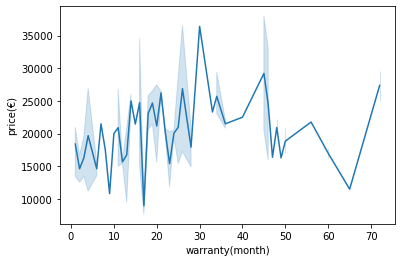

In [431]:
sns.lineplot(data=df, x="warranty(month)", y = "price(€)")

<AxesSubplot:xlabel='warranty(month)', ylabel='price(€)'>

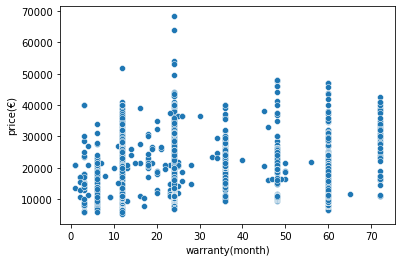

In [432]:
sns.scatterplot(data=df, x="warranty(month)", y = "price(€)")

In [433]:
df.drop(columns={"warranty(month)"}, inplace=True)

##### 11- paint_type column

In [434]:
df["paint_type"].value_counts(dropna=False, normalize=True)

Metallic       0.615240
NaN            0.362586
Uni/basic      0.021798
Perl effect    0.000377
Name: paint_type, dtype: float64

In [435]:
df.columns

Index(['make_model', 'body_type', 'price(€)', 'vat', 'km', 'hp(kw)', 'type',
       'previous_owners', 'inspection_new', 'paint_type', 'num_of_door',
       'num_of_seat', 'gearing_type', 'displacement(cc)', 'cylinders',
       'weight(kg)', 'drive_chain', 'fuel', 'co2_emission(g/km)',
       'emission_class', 'comfort_and_convenience', 'entertaintment_and_media',
       'extras', 'safety_and_security', 'gears', 'age', 'upholstery_style',
       'upholstery_color', 'consumption_comb(100km/l)',
       'consumption_city(100km/l)', 'consumption_country(100km/l)',
       'short_description'],
      dtype='object')

In [436]:
makemodel_painttype_freq = pd.crosstab(df["make_model"], df["paint_type"])

In [437]:
makemodel_painttype_freq

paint_type,Metallic,Perl effect,Uni/basic
make_model,,,
Audi A1,1742,1,63
Audi A2,1,0,0
Audi A3,1792,0,97
Opel Astra,1713,2,26
Opel Corsa,1281,2,53
Opel Insignia,1780,0,23
Renault Clio,861,1,52
Renault Duster,1,0,16
Renault Espace,623,0,17


In [438]:
chi2, pval, dof, expected = stats.chi2_contingency(makemodel_painttype_freq)

In [439]:
chi2
# make_model and paint_type variables appear to be associated.

507.29321973725234

In [440]:
bodytype_painttype_freq = pd.crosstab(df["body_type"], df["paint_type"])

In [441]:
bodytype_painttype_freq

paint_type,Metallic,Perl effect,Uni/basic
body_type,,,
Compact,1975,0,13
Convertible,4,0,0
Coupe,10,0,1
Off-Road,15,0,16
Other,192,0,4
Sedans,4627,4,270
Station wagon,2433,2,29
Transporter,36,0,3
Van,502,0,11


In [442]:
chi2, pval, dof, expected = stats.chi2_contingency(bodytype_painttype_freq)

In [443]:
chi2
# body_type and paint_type variables appear to be associated.

375.72631528596554

In [444]:
df["make_model"].unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)

In [445]:
df["body_type"].unique()

array(['Sedans', 'Station wagon', 'Compact', 'Other', 'Coupe', 'Van',
       'Off-Road', 'Convertible', 'Transporter'], dtype=object)

In [446]:
df.groupby(["make_model", "body_type"])["paint_type"].value_counts()

make_model      body_type      paint_type 
Audi A1         Compact        Metallic        723
                               Uni/basic         5
                Coupe          Metallic          2
                Other          Metallic         10
                Sedans         Metallic        990
                               Uni/basic        57
                               Perl effect       1
                Station wagon  Metallic         16
                               Uni/basic         1
                Van            Metallic          1
Audi A2         Off-Road       Metallic          1
Audi A3         Compact        Metallic        106
                               Uni/basic         3
                Convertible    Metallic          4
                Coupe          Metallic          4
                Other          Metallic         11
                               Uni/basic         2
                Sedans         Metallic       1498
                               Uni/basi

In [447]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        condition = (df["make_model"] == makemodel) & (df["body_type"] == bodytype)
        df.loc[condition, "paint_type"] = df.loc[condition, "paint_type"].fillna(method="ffill").fillna(method="bfill")

for makemodel in list(df["make_model"].unique()):
    condition = df["make_model"] == makemodel
    df.loc[condition, "paint_type"] = df.loc[condition, "paint_type"].fillna(method="ffill").fillna(method="bfill")

In [448]:
df["paint_type"].value_counts(dropna=False, normalize=True)

Metallic       0.958289
Uni/basic      0.039701
Perl effect    0.002010
Name: paint_type, dtype: float64

##### 12- num_of_door column

In [449]:
df["num_of_door"].value_counts(dropna=False, normalize=True)

5.0    0.727119
4.0    0.193417
3.0    0.052265
2.0    0.013757
NaN    0.013317
1.0    0.000063
7.0    0.000063
Name: num_of_door, dtype: float64

In [450]:
df.groupby(["make_model", "body_type"])["num_of_door"].value_counts()

make_model      body_type      num_of_door
Audi A1         Compact        5.0            666
                               4.0            207
                               3.0             80
                               2.0             69
                Coupe          2.0              1
                                             ... 
Renault Espace  Station wagon  4.0              4
                Transporter    5.0             52
                Van            5.0            704
                               4.0             90
                               7.0              1
Name: num_of_door, Length: 104, dtype: int64

In [451]:
bodytype_numofdoor_freq = pd.crosstab(df["body_type"], df["num_of_door"])

In [452]:
bodytype_numofdoor_freq

num_of_door,1.0,2.0,3.0,4.0,5.0,7.0
body_type,,,,,,
Compact,1,157,429,658,1871,0
Convertible,0,7,0,0,1,0
Coupe,0,1,17,2,4,0
Off-Road,0,0,0,1,54,0
Other,0,3,7,22,254,0
Sedans,0,50,373,1403,5978,0
Station wagon,0,1,2,902,2624,0
Transporter,0,0,4,1,82,0
Van,0,0,0,90,707,1


In [453]:
chi2, pval, dof, expected = stats.chi2_contingency(bodytype_numofdoor_freq)

In [454]:
chi2

1991.292666510444

In [455]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        condition = (df["make_model"] == makemodel) & (df["body_type"] == bodytype)
        df.loc[condition, "num_of_door"] = df.loc[condition, "num_of_door"].fillna(method="ffill").fillna(method="bfill")

df["num_of_door"] = df["num_of_door"].fillna(method="ffill").fillna(method="bfill")

In [456]:
df["num_of_door"].value_counts(dropna=False, normalize=True)

5.0    0.736793
4.0    0.195490
3.0    0.053584
2.0    0.013946
1.0    0.000126
7.0    0.000063
Name: num_of_door, dtype: float64

##### 13- num_of_seat column

In [457]:
df["num_of_seat"].value_counts(dropna=False, normalize=True)

5.0    0.837741
4.0    0.070670
NaN    0.061373
7.0    0.022740
2.0    0.007287
6.0    0.000126
3.0    0.000063
Name: num_of_seat, dtype: float64

In [458]:
bodytype_numofseat_freq = pd.crosstab(df["body_type"], df["num_of_seat"])

In [459]:
bodytype_numofseat_freq

num_of_seat,2.0,3.0,4.0,5.0,6.0,7.0
body_type,,,,,,
Compact,8,1,436,2522,1,2
Convertible,0,0,5,2,0,0
Coupe,1,0,2,17,0,0
Off-Road,0,0,0,51,0,3
Other,4,0,2,259,0,3
Sedans,71,0,664,6711,0,4
Station wagon,1,0,14,3352,1,19
Transporter,30,0,1,37,0,16
Van,1,0,1,385,0,315


In [460]:
chi2, pval, dof, expected = stats.chi2_contingency(bodytype_numofseat_freq)

In [461]:
chi2

7708.086305392542

In [462]:
makemodel_numofseat_freq = pd.crosstab(df["make_model"], df["num_of_seat"])

In [463]:
makemodel_numofseat_freq

num_of_seat,2.0,3.0,4.0,5.0,6.0,7.0
make_model,,,,,,
Audi A1,0,1,1080,1392,1,0
Audi A2,0,0,0,1,0,0
Audi A3,0,0,25,2951,0,0
Opel Astra,0,0,5,2357,0,0
Opel Corsa,5,0,7,2087,0,0
Opel Insignia,1,0,2,2487,0,0
Renault Clio,110,0,5,1520,0,0
Renault Duster,0,0,0,34,0,0
Renault Espace,0,0,1,507,1,362


In [464]:
chi2, pval, dof, expected = stats.chi2_contingency(makemodel_numofseat_freq)

In [465]:
chi2

12358.578644829819

In [466]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        condition = (df["make_model"] == makemodel) & (df["body_type"] == bodytype)
        df.loc[condition, "num_of_seat"] = df.loc[condition, "num_of_seat"].fillna(method="ffill").fillna(method="bfill")

df["num_of_seat"] = df["num_of_seat"].fillna(method="ffill").fillna(method="bfill")

In [467]:
df["num_of_seat"].value_counts(dropna=False, normalize=True)

5.0    0.890885
4.0    0.075005
7.0    0.025693
2.0    0.008229
6.0    0.000126
3.0    0.000063
Name: num_of_seat, dtype: float64

##### 14- gearing_type column

In [468]:
df["gearing_type"].value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: gearing_type, dtype: int64

In [469]:
# There is no null valuue.

##### 15- displacement(cc) column

In [470]:
df["displacement(cc)"].isnull().sum()

496

<AxesSubplot:>

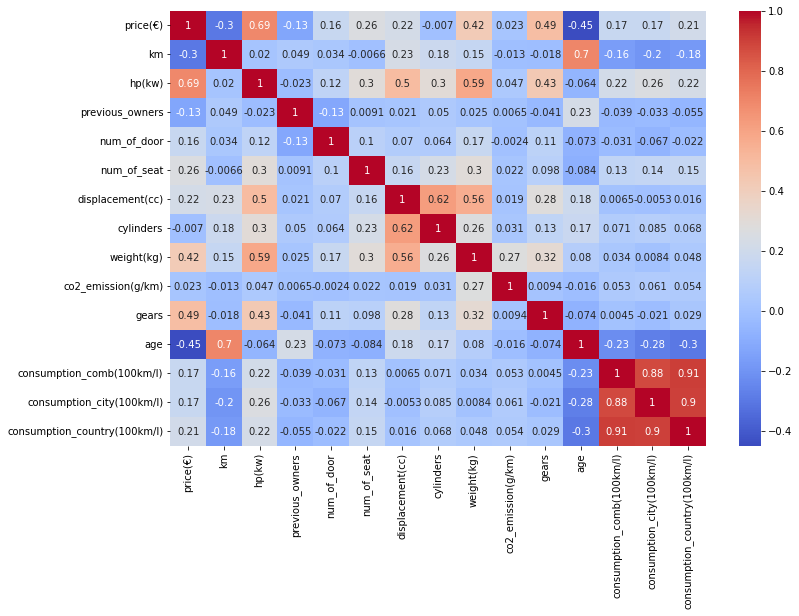

In [471]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")

In [472]:
df.loc[df["cylinders"].notnull()].groupby("cylinders")["displacement(cc)"].describe()

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
1.0,1.0,1398.000000,NaN,1398.0,1398.0,1398.0,1398.0,1398.0
2.0,1.0,1997.000000,NaN,1997.0,1997.0,1997.0,1997.0,1997.0
3.0,2102.0,1052.526641,156.342812,890.0,999.0,999.0,999.0,1598.0
4.0,8063.0,1534.819918,261.890320,1.0,1398.0,1598.0,1598.0,15898.0
5.0,21.0,2438.000000,192.468179,1598.0,2480.0,2480.0,2480.0,2480.0
6.0,3.0,2055.000000,789.815801,1598.0,1599.0,1600.0,2283.5,2967.0
8.0,1.0,999.000000,NaN,999.0,999.0,999.0,999.0,999.0


<AxesSubplot:xlabel='cylinders', ylabel='displacement(cc)'>

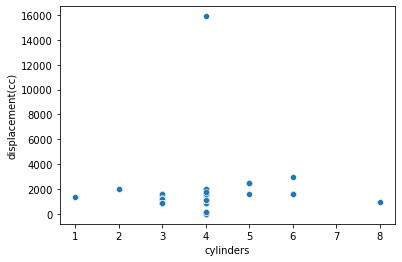

In [473]:
sns.scatterplot(data=df, x="cylinders", y="displacement(cc)")

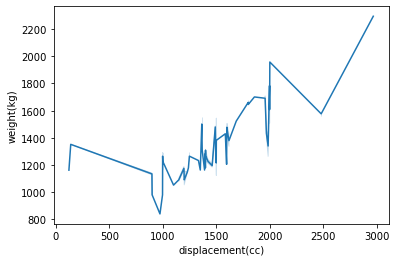

In [474]:
sns.lineplot(data=df, x="displacement(cc)", y="weight(kg)");

<AxesSubplot:xlabel='make_model', ylabel='displacement(cc)'>

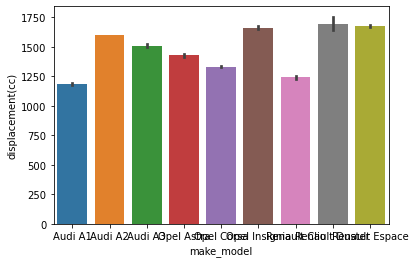

In [475]:
sns.barplot(data=df, x="make_model", y="displacement(cc)")

<AxesSubplot:xlabel='body_type', ylabel='displacement(cc)'>

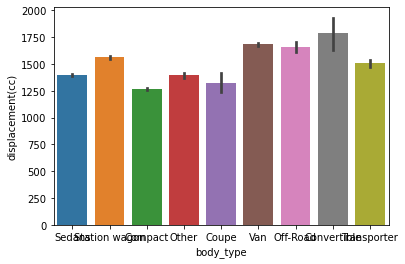

In [476]:
sns.barplot(data=df, x="body_type", y="displacement(cc)")

<AxesSubplot:xlabel='fuel', ylabel='displacement(cc)'>

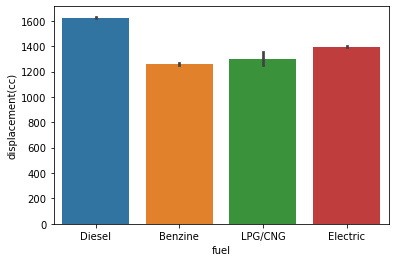

In [477]:
sns.barplot(data=df, x="fuel", y="displacement(cc)")

<AxesSubplot:xlabel='drive_chain', ylabel='displacement(cc)'>

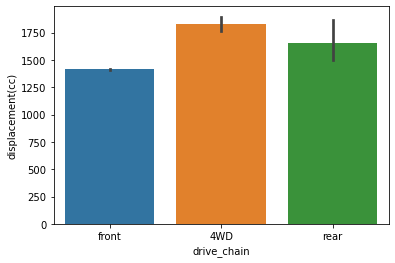

In [478]:
sns.barplot(data=df, x="drive_chain", y="displacement(cc)")

In [479]:
df.columns

Index(['make_model', 'body_type', 'price(€)', 'vat', 'km', 'hp(kw)', 'type',
       'previous_owners', 'inspection_new', 'paint_type', 'num_of_door',
       'num_of_seat', 'gearing_type', 'displacement(cc)', 'cylinders',
       'weight(kg)', 'drive_chain', 'fuel', 'co2_emission(g/km)',
       'emission_class', 'comfort_and_convenience', 'entertaintment_and_media',
       'extras', 'safety_and_security', 'gears', 'age', 'upholstery_style',
       'upholstery_color', 'consumption_comb(100km/l)',
       'consumption_city(100km/l)', 'consumption_country(100km/l)',
       'short_description'],
      dtype='object')

In [480]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        for cylinder in df.loc[df["cylinders"].notnull(), "cylinders"].unique():
            for fueltype in df["fuel"].unique():
                condition =  (df["make_model"] == makemodel) & (df["fuel"]==fueltype) \
                & (df["body_type"] == bodytype) & (df.loc[df["cylinders"].notnull(), "cylinders"] == cylinder)
                median = df[condition]["displacement(cc)"].median()    
                df.loc[condition, "displacement(cc)"] = \
                df.loc[condition, "displacement(cc)"].fillna(median)
                
            

In [481]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
                condition =  (df["make_model"] == makemodel) & (df["body_type"] == bodytype) 
                df.loc[condition, "displacement(cc)"] = \
                df.loc[condition, "displacement(cc)"].fillna(method="ffill").fillna(method="bfill")

                
for bodytype in df["body_type"].unique():
    condition = (df["body_type"] == bodytype)
    df.loc[condition, "displacement(cc)"] = \
    df.loc[condition, "displacement(cc)"].fillna(method="ffill").fillna(method="bfill")

##### 16- cylinders column

In [482]:
df["cylinders"].value_counts(dropna=False)

4.0    8105
NaN    5680
3.0    2104
5.0      22
6.0       3
8.0       2
2.0       2
1.0       1
Name: cylinders, dtype: int64

In [483]:
df.columns

Index(['make_model', 'body_type', 'price(€)', 'vat', 'km', 'hp(kw)', 'type',
       'previous_owners', 'inspection_new', 'paint_type', 'num_of_door',
       'num_of_seat', 'gearing_type', 'displacement(cc)', 'cylinders',
       'weight(kg)', 'drive_chain', 'fuel', 'co2_emission(g/km)',
       'emission_class', 'comfort_and_convenience', 'entertaintment_and_media',
       'extras', 'safety_and_security', 'gears', 'age', 'upholstery_style',
       'upholstery_color', 'consumption_comb(100km/l)',
       'consumption_city(100km/l)', 'consumption_country(100km/l)',
       'short_description'],
      dtype='object')

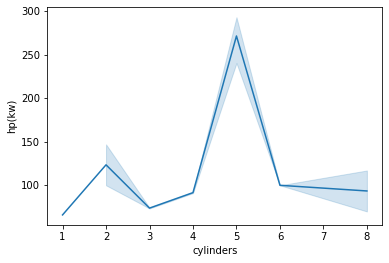

In [484]:
sns.lineplot(data=df, y="hp(kw)", x="cylinders");

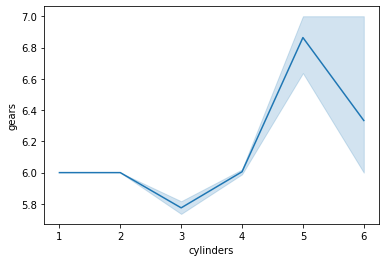

In [485]:
sns.lineplot(data=df, y="gears", x="cylinders");

In [486]:
df["cylinders"].corr(df["gears"])

0.12908615695231251

In [487]:
df["cylinders"].corr(df["displacement(cc)"])

0.6204391244167515

In [488]:
df.groupby("cylinders")["displacement(cc)"].describe()

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
1.0,1.0,1398.000000,NaN,1398.0,1398.00,1398.0,1398.00,1398.0
2.0,2.0,1797.500000,282.135606,1598.0,1697.75,1797.5,1897.25,1997.0
3.0,2104.0,1052.676806,156.480289,890.0,999.00,999.0,999.00,1598.0
4.0,8105.0,1534.947070,261.427433,1.0,1398.00,1598.0,1598.00,15898.0
5.0,22.0,2379.409091,332.871870,1149.0,2480.00,2480.0,2480.00,2480.0
6.0,3.0,2055.000000,789.815801,1598.0,1599.00,1600.0,2283.50,2967.0
8.0,2.0,1298.500000,423.556962,999.0,1148.75,1298.5,1448.25,1598.0


<AxesSubplot:xlabel='cylinders', ylabel='make_model'>

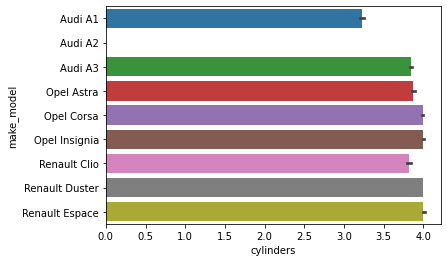

In [489]:
sns.barplot(data=df, x="cylinders", y="make_model")

<AxesSubplot:xlabel='cylinders', ylabel='body_type'>

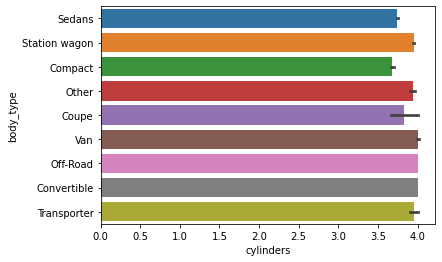

In [490]:
sns.barplot(data=df, x="cylinders", y="body_type")

<AxesSubplot:xlabel='cylinders', ylabel='fuel'>

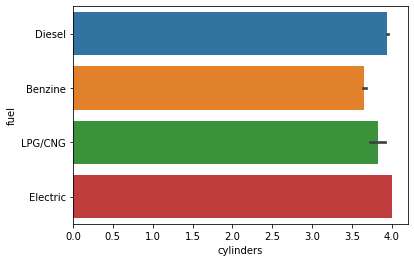

In [491]:
sns.barplot(data=df, x="cylinders", y="fuel")

In [492]:
df.columns

Index(['make_model', 'body_type', 'price(€)', 'vat', 'km', 'hp(kw)', 'type',
       'previous_owners', 'inspection_new', 'paint_type', 'num_of_door',
       'num_of_seat', 'gearing_type', 'displacement(cc)', 'cylinders',
       'weight(kg)', 'drive_chain', 'fuel', 'co2_emission(g/km)',
       'emission_class', 'comfort_and_convenience', 'entertaintment_and_media',
       'extras', 'safety_and_security', 'gears', 'age', 'upholstery_style',
       'upholstery_color', 'consumption_comb(100km/l)',
       'consumption_city(100km/l)', 'consumption_country(100km/l)',
       'short_description'],
      dtype='object')

In [493]:
df["cylinders"].value_counts()

4.0    8105
3.0    2104
5.0      22
6.0       3
8.0       2
2.0       2
1.0       1
Name: cylinders, dtype: int64

In [494]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
            for fueltype in df["fuel"].unique():
                condition =  (df["make_model"] == makemodel) & (df["fuel"]==fueltype) \
                & (df["body_type"] == bodytype)
                mode = df[condition]["cylinders"].mode()
                df.loc[condition, "cylinders"] = \
                df.loc[condition, "cylinders"].fillna(mode)
                
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
            for fueltype in df["fuel"].unique():
                condition =  (df["make_model"] == makemodel) & (df["fuel"]==fueltype) \
                & (df["body_type"] == bodytype)
                df.loc[condition, "cylinders"] = \
                df.loc[condition, "cylinders"].fillna(method="ffill").fillna(method="bfill")
                
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        condition =  (df["make_model"] == makemodel) & (df["body_type"] == bodytype)
        df.loc[condition, "cylinders"] = df.loc[condition, "cylinders"].fillna(method="ffill").fillna(method="bfill")   
        
df["cylinders"] = df["cylinders"].fillna(method="ffill").fillna(method="bfill")

In [497]:
df["cylinders"].isnull().sum()

0

##### 17- weight(kg) column

In [498]:
df["weight(kg)"].value_counts(dropna=False, normalize=True)

NaN       0.438093
1163.0    0.036058
1360.0    0.022363
1165.0    0.018908
1335.0    0.015202
            ...   
1960.0    0.000063
1258.0    0.000063
1167.0    0.000063
1331.0    0.000063
2037.0    0.000063
Name: weight(kg), Length: 435, dtype: float64

<AxesSubplot:>

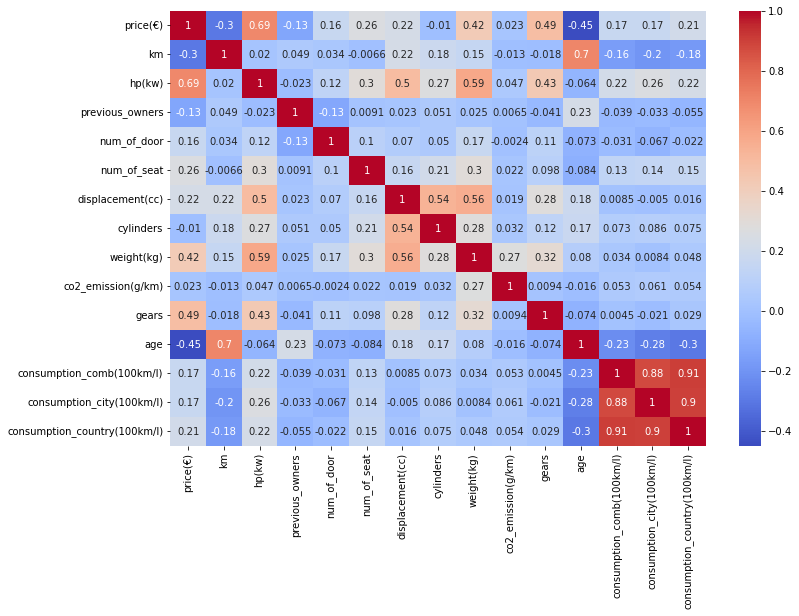

In [499]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")

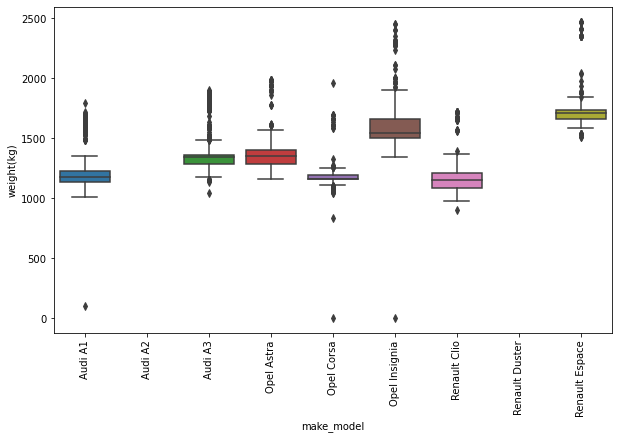

In [500]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="make_model", y="weight(kg)")
plt.xticks(rotation=90);

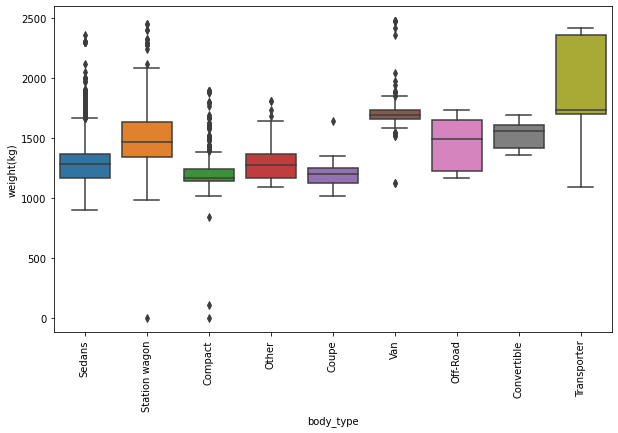

In [501]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="body_type", y="weight(kg)")
plt.xticks(rotation=90);

<AxesSubplot:xlabel='weight(kg)', ylabel='displacement(cc)'>

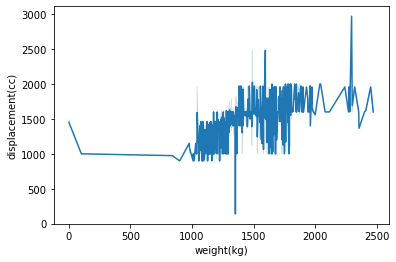

In [502]:
sns.lineplot(data=df, x="weight(kg)", y="displacement(cc)")

In [503]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        condition = (df["make_model"] == makemodel) & (df["body_type"] == bodytype)
        df.loc[condition, "weight(kg)"] = df.loc[condition, "weight(kg)"].fillna(method="ffill").fillna(method="bfill")

for bodytype in list(df["body_type"].unique()):
    condition = df["body_type"] == bodytype
    df.loc[condition, "weight(kg)"] = df.loc[condition, "weight(kg)"].fillna(method="ffill").fillna(method="bfill")


In [504]:
df["weight(kg)"].value_counts(dropna=False, normalize=True)

1163.0    0.061248
1165.0    0.036497
1360.0    0.031472
1335.0    0.029336
1199.0    0.028205
            ...   
1267.0    0.000063
1430.0    0.000063
1396.0    0.000063
1181.0    0.000063
2037.0    0.000063
Name: weight(kg), Length: 434, dtype: float64

In [505]:
df["weight(kg)"].isnull().sum()

0

##### 18- drive_chain column

In [506]:
df["drive_chain"].value_counts(dropna=False, normalize=True)

front    0.558201
NaN      0.430806
4WD      0.010742
rear     0.000251
Name: drive_chain, dtype: float64

In [507]:
df.groupby("make_model")["drive_chain"].value_counts()

make_model      drive_chain
Audi A1         front          1693
                4WD               3
Audi A2         front             1
Audi A3         front          2008
                4WD              19
Opel Astra      front          1346
                4WD               2
Opel Corsa      front          1170
Opel Insignia   front          1409
                4WD              94
                rear              3
Renault Clio    front           795
                4WD              11
                rear              1
Renault Duster  4WD               2
Renault Espace  front           464
                4WD              40
Name: drive_chain, dtype: int64

In [508]:
df.groupby(["make_model", "body_type"])["drive_chain"].value_counts()

make_model      body_type      drive_chain
Audi A1         Compact        front           685
                               4WD               2
                Other          front            12
                Sedans         front           977
                               4WD               1
                Station wagon  front            18
                Van            front             1
Audi A2         Off-Road       front             1
Audi A3         Compact        front           156
                               4WD               1
                Convertible    front             3
                               4WD               1
                Coupe          front             3
                Other          front            10
                Sedans         front          1703
                               4WD              17
                Station wagon  front           133
Opel Astra      Compact        front           104
                Off-Road       front   

In [509]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        condition = (df["make_model"] == makemodel) & (df["body_type"] == bodytype)
        df.loc[condition, "drive_chain"] = df.loc[condition, "drive_chain"].fillna(method="ffill").fillna(method="bfill")
    
for bodytype in list(df["body_type"].unique()):
    condition = df["body_type"] == bodytype
    df.loc[condition, "drive_chain"] = df.loc[condition, "drive_chain"].fillna(method="ffill").fillna(method="bfill")

In [510]:
df["drive_chain"].value_counts(dropna=False, normalize=True)

front    0.978391
4WD      0.021295
rear     0.000314
Name: drive_chain, dtype: float64

##### 19- fuel column

In [511]:
df["fuel"].value_counts(dropna=False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: fuel, dtype: int64

In [512]:
# There is no null value.

##### 20- co2_emission(g/km) column

In [513]:
df["co2_emission(g/km)"].value_counts(dropna=False)

NaN       2436
120.0      740
99.0       545
97.0       537
104.0      501
          ... 
14.0         1
1060.0       1
51.0         1
165.0        1
193.0        1
Name: co2_emission(g/km), Length: 123, dtype: int64

In [514]:
df.columns

Index(['make_model', 'body_type', 'price(€)', 'vat', 'km', 'hp(kw)', 'type',
       'previous_owners', 'inspection_new', 'paint_type', 'num_of_door',
       'num_of_seat', 'gearing_type', 'displacement(cc)', 'cylinders',
       'weight(kg)', 'drive_chain', 'fuel', 'co2_emission(g/km)',
       'emission_class', 'comfort_and_convenience', 'entertaintment_and_media',
       'extras', 'safety_and_security', 'gears', 'age', 'upholstery_style',
       'upholstery_color', 'consumption_comb(100km/l)',
       'consumption_city(100km/l)', 'consumption_country(100km/l)',
       'short_description'],
      dtype='object')

In [515]:
df["co2_emission(g/km)"].describe()

count    13483.000000
mean       123.739672
std        269.952395
min          0.000000
25%        104.000000
50%        116.000000
75%        129.000000
max      14457.000000
Name: co2_emission(g/km), dtype: float64

In [516]:
df.groupby("fuel")["co2_emission(g/km)"].describe()

,count,mean,std,min,25%,50%,75%,max
fuel,,,,,,,,
Benzine,7462.0,133.704235,361.895178,0.0,111.0,123.0,134.0,14457.0
Diesel,5967.0,111.505614,24.737175,0.0,99.0,106.0,120.0,1060.0
Electric,3.0,36.000000,0.000000,36.0,36.0,36.0,36.0,36.0
LPG/CNG,51.0,102.333333,11.726324,91.0,94.0,97.0,113.0,135.0


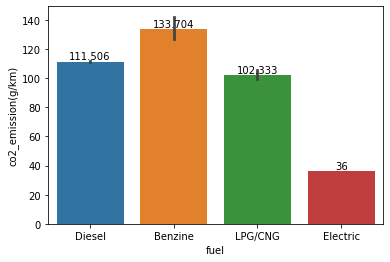

In [517]:
ax = sns.barplot(data=df, x="fuel", y="co2_emission(g/km)")
for container in ax.containers:
    ax.bar_label(container)

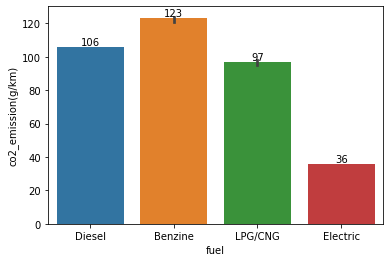

In [518]:
ax = sns.barplot(data=df, x="fuel", y="co2_emission(g/km)", estimator=np.median)
for container in ax.containers:
    ax.bar_label(container)

<AxesSubplot:xlabel='co2_emission(g/km)', ylabel='displacement(cc)'>

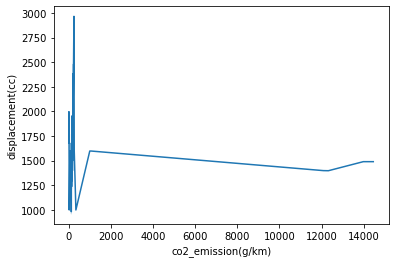

In [519]:
sns.lineplot(data=df, x="co2_emission(g/km)", y="displacement(cc)")

<AxesSubplot:xlabel='co2_emission(g/km)', ylabel='weight(kg)'>

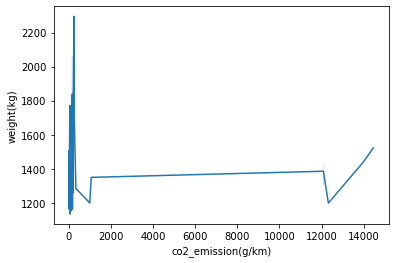

In [520]:
sns.lineplot(data=df, x="co2_emission(g/km)", y="weight(kg)")

In [521]:
for fueltype in df["fuel"].unique():
    condition = df["fuel"] == fueltype
    median = df[condition]["co2_emission(g/km)"].median()    
    df.loc[condition, "co2_emission(g/km)"] = df.loc[condition, "co2_emission(g/km)"].fillna(median)     

In [522]:
df["co2_emission(g/km)"].describe()

count    15919.000000
mean       122.171870
std        248.490428
min          0.000000
25%        106.000000
50%        116.000000
75%        127.000000
max      14457.000000
Name: co2_emission(g/km), dtype: float64

##### 21- emission_class column

In [523]:
df["emission_class"].value_counts(dropna=False, normalize=True)

Euro 6    0.764684
NaN       0.227904
Euro 5    0.004900
Euro 4    0.002513
Name: emission_class, dtype: float64

In [524]:
emissionclass_fuel_freq = pd.crosstab(df["emission_class"], df["fuel"])

In [525]:
emissionclass_fuel_freq

fuel,Benzine,Diesel,Electric,LPG/CNG
emission_class,,,,
Euro 4,38,2,0,0
Euro 5,28,49,0,1
Euro 6,6395,5725,4,49


In [526]:
chi2, pval, dof, expected = stats.chi2_contingency(emissionclass_fuel_freq)

In [527]:
chi2

38.67384809064317

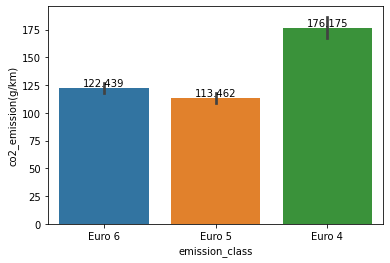

In [528]:
ax = sns.barplot(data=df, x="emission_class", y="co2_emission(g/km)", estimator=np.mean)
for container in ax.containers:
    ax.bar_label(container)

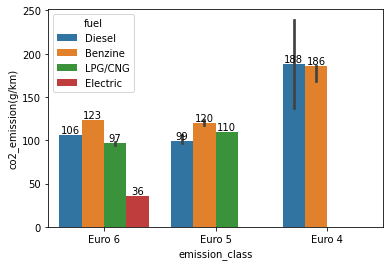

In [529]:
ax = sns.barplot(data=df, x="emission_class", y="co2_emission(g/km)", estimator=np.median, hue="fuel")
for container in ax.containers:
    ax.bar_label(container)

In [530]:
df.groupby("emission_class")["co2_emission(g/km)"].describe()

,count,mean,std,min,25%,50%,75%,max
emission_class,,,,,,,,
Euro 4,40.0,176.175000,34.442734,123.0,150.0,186.0,186.00,331.0
Euro 5,78.0,113.461538,20.589805,85.0,97.0,107.0,122.25,175.0
Euro 6,12173.0,122.438676,254.457244,0.0,104.0,116.0,128.00,14457.0


In [531]:
df.groupby(["emission_class", "fuel"])["co2_emission(g/km)"].describe()

count        mean         std    min     25%    50%  \
emission_class fuel                                                             
Euro 4         Benzine     38.0  175.552632   33.194511  123.0  150.00  186.0   
               Diesel       2.0  188.000000   72.124892  137.0  162.50  188.0   
Euro 5         Benzine     28.0  123.714286   18.110478   97.0  116.25  120.0   
               Diesel      49.0  107.673469   19.995195   85.0   95.00   99.0   
               LPG/CNG      1.0  110.000000         NaN  110.0  110.00  110.0   
Euro 6         Benzine   6395.0  133.012197  350.341622    0.0  111.00  123.0   
               Diesel    5725.0  110.867598   17.656892   82.0   99.00  106.0   
               Electric     4.0   36.000000    0.000000   36.0   36.00   36.0   
               LPG/CNG     49.0  101.469388   11.527326   91.0   94.00   97.0   

                            75%      max  
emission_class fuel                       
Euro 4         Benzine   186.00    331.0  
               Diesel    213.50    239.0  
Euro 5         Benzine   129.25    170.0  
               Diesel    110.00    175.0  
               LPG/CNG   110.00    110.0  
Euro 6         Benzine   133.00  14457.0  
               Diesel    119.00    199.0  
               Electric   36.00     36.0  
               LPG/CNG   113.00    135.0

In [532]:
df.groupby(["make_model", "fuel"])["co2_emission(g/km)"].describe()

count        mean         std    min     25%    50%  \
make_model     fuel                                                             
Audi A1        Benzine   1828.0  108.506565   10.383161   97.0  102.00  108.0   
               Diesel     786.0  100.641221    4.780377   89.0   97.00  101.0   
Audi A2        Diesel       1.0  106.000000         NaN  106.0  106.00  106.0   
Audi A3        Benzine    938.0  117.304904   12.494643   96.0  111.25  117.0   
               Diesel    2119.0  106.746107   28.876764   85.0  103.00  106.0   
               Electric     4.0   36.000000    0.000000   36.0   36.00   36.0   
               LPG/CNG     36.0   97.000000    7.996428   91.0   93.25   94.5   
Opel Astra     Benzine   1385.0  149.163899  556.571317    0.0  117.00  124.0   
               Diesel    1139.0  105.787533   11.663885    5.0   95.00  106.0   
               LPG/CNG      2.0  105.000000   11.313708   97.0  101.00  105.0   
Opel Corsa     Benzine   2054.0  135.062804  269.296557   51.0  123.00  126.0   
               Diesel     152.0  102.125000    7.400834   82.0  100.00  106.0   
               LPG/CNG     13.0  116.076923    9.543423   97.0  113.00  113.0   
Opel Insignia  Benzine    883.0  170.201586  670.024432   45.0  130.00  138.0   
               Diesel    1715.0  126.299125   21.100243    0.0  106.00  124.0   
Renault Clio   Benzine   1156.0  122.694637    7.833064   94.0  118.00  123.0   
               Diesel     669.0   94.059791    9.693013   82.0   85.00   92.0   
               Electric     1.0   36.000000         NaN   36.0   36.00   36.0   
               LPG/CNG     13.0   97.615385    0.506370   97.0   97.00   98.0   
Renault Duster Benzine     34.0  170.235294   34.864290    1.0  150.00  186.0   
Renault Espace Benzine    273.0  151.443223   14.962621  123.0  140.00  153.0   
               Diesel     718.0  119.215877   12.104815  106.0  106.00  120.0   

                           75%      max  
make_model     fuel                      
Audi A1        Benzine   112.0    331.0  
               Diesel    105.0    110.0  
Audi A2        Diesel    106.0    106.0  
Audi A3        Benzine   121.0    194.0  
               Diesel    108.0   1060.0  
               Electric   36.0     36.0  
               LPG/CNG    97.0    122.0  
Opel Astra     Benzine   128.0  12087.0  
               Diesel    119.0    144.0  
               LPG/CNG   109.0    113.0  
Opel Corsa     Benzine   137.0  12324.0  
               Diesel    106.0    137.0  
               LPG/CNG   124.0    135.0  
Opel Insignia  Benzine   141.0  14457.0  
               Diesel    144.0    239.0  
Renault Clio   Benzine   127.0    140.0  
               Diesel    106.0    136.0  
               Electric   36.0     36.0  
               LPG/CNG    98.0     98.0  
Renault Duster Benzine   186.0    186.0  
Renault Espace Benzine   161.0    194.0  
               Diesel    123.0    191.0

In [533]:
for makemodel in df["make_model"].unique():
    for fuel in df["fuel"].unique():
        condition = (df["make_model"] == makemodel) & (df["fuel"] == fuel)
        df.loc[condition, "emission_class"] = df.loc[condition, "emission_class"].fillna(method="ffill").fillna(method="bfill")

for fuel in list(df["fuel"].unique()):
    condition = df["fuel"] == fuel
    df.loc[condition, "emission_class"] = df.loc[condition, "emission_class"].fillna(method="ffill").fillna(method="bfill")        

In [534]:
df["emission_class"].isnull().sum()

0

In [535]:
df["emission_class"].value_counts(normalize=True)

Euro 6    0.990829
Euro 5    0.006282
Euro 4    0.002890
Name: emission_class, dtype: float64

##### 22- comfort_and_convenience column

In [536]:
df["comfort_and_convenience"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   216
Air conditioning,Elect

In [537]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        condition = (df["make_model"] == makemodel) & (df["body_type"] == bodytype)
        mode = list(df[condition]["comfort_and_convenience"].mode())
        if mode != []:
            df.loc[condition, "comfort_and_convenience"] = \
            df.loc[condition, "comfort_and_convenience"].fillna(df[condition]["comfort_and_convenience"].mode()[0])
        else:
            df.loc[condition, "comfort_and_convenience"] = \
            df.loc[condition, "comfort_and_convenience"].fillna(df["comfort_and_convenience"].mode()[0])


In [538]:
df["comfort_and_convenience"].isnull().sum()

0

##### 23- entertaintment_and_media column

In [539]:
df["entertaintment_and_media"].value_counts(dropna=False)

NaN                                                                                                 1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                          1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                       982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                             783
On-board computer,Radio                                                                              487
                                                                                                    ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,Radio                                           1
CD player,Hands-free equipment,MP3,Radio,USB                                                           1
MP3,Radio,Sound system,USB                                                                             1
Bluetooth,MP3,On-board computer,Radio,Television,USB   

In [540]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        condition = (df["make_model"] == makemodel) & (df["body_type"] == bodytype)
        mode = list(df[condition]["entertaintment_and_media"].mode())
        if mode != []:
            df.loc[condition, "entertaintment_and_media"] = \
            df.loc[condition, "entertaintment_and_media"].fillna(df[condition]["entertaintment_and_media"].mode()[0])
        else:
            df.loc[condition, "entertaintment_and_media"] = \
            df.loc[condition, "entertaintment_and_media"].fillna(df["entertaintment_and_media"].mode()[0])

In [541]:
df["entertaintment_and_media"].isnull().sum()

0

##### 24- extras column

In [542]:
df["extras"].value_counts(dropna=False)

Alloy wheels                                                                                               3245
NaN                                                                                                        2962
Alloy wheels,Touch screen                                                                                   697
Alloy wheels,Voice Control                                                                                  577
Alloy wheels,Touch screen,Voice Control                                                                     541
                                                                                                           ... 
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch                            1
Alloy wheels,Catalytic Converter,Ski bag,Sport package,Voice Control                                    

In [543]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        condition = (df["make_model"] == makemodel) & (df["body_type"] == bodytype)
        mode = list(df[condition]["extras"].mode())
        if mode != []:
            df.loc[condition, "extras"] = \
            df.loc[condition, "extras"].fillna(df[condition]["extras"].mode()[0])
        else:
            df.loc[condition, "extras"] = \
            df.loc[condition, "extras"].fillna(df["extras"].mode()[0])

In [544]:
df["extras"].isnull().sum()

0

###### 25- safety_and_security column

In [545]:
df["safety_and_security"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                               982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                           

In [546]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        condition = (df["make_model"] == makemodel) & (df["body_type"] == bodytype)
        mode = list(df[condition]["safety_and_security"].mode())
        if mode != []:
            df.loc[condition, "safety_and_security"] = \
            df.loc[condition, "safety_and_security"].fillna(df[condition]["safety_and_security"].mode()[0])
        else:
            df.loc[condition, "safety_and_security"] = \
            df.loc[condition, "safety_and_security"].fillna(df["safety_and_security"].mode()[0])

In [547]:
df["safety_and_security"].isnull().sum()

0

##### 26- gears column

In [548]:
df["gears"].value_counts(dropna=False)

6.0     5822
NaN     4712
5.0     3239
7.0     1908
8.0      224
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: gears, dtype: int64

<AxesSubplot:>

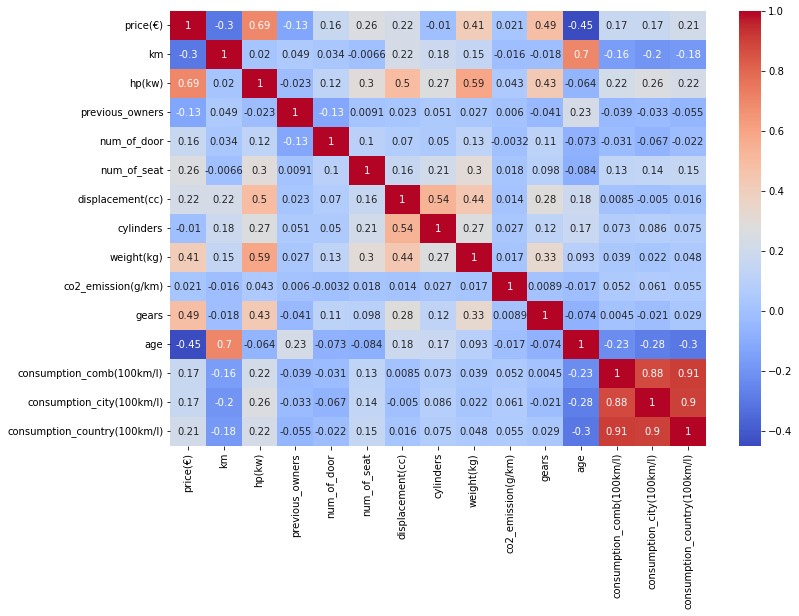

In [549]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")

<AxesSubplot:xlabel='make_model', ylabel='gears'>

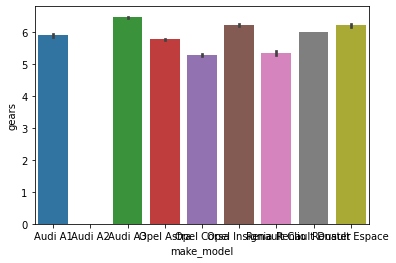

In [550]:
sns.barplot(data=df, y="gears", x="make_model")

<AxesSubplot:xlabel='gears', ylabel='hp(kw)'>

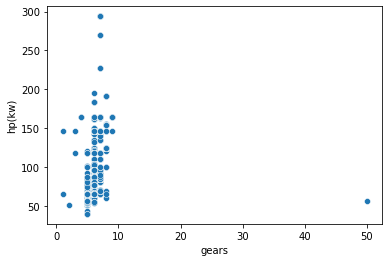

In [551]:
sns.scatterplot(data=df, x="gears", y="hp(kw)")

<AxesSubplot:xlabel='gears', ylabel='price(€)'>

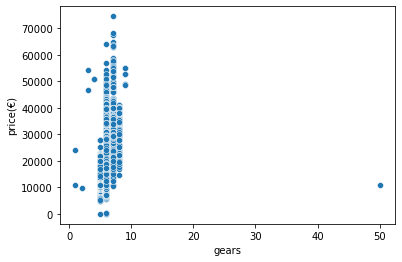

In [552]:
sns.scatterplot(data=df, x="gears", y="price(€)")

In [553]:
df.groupby(["make_model", "body_type"])["gears"].describe()

count      mean       std  min   25%  50%  \
make_model     body_type                                                   
Audi A1        Compact         566.0  5.865724  0.917668  5.0  5.00  6.0   
               Coupe             1.0  5.000000       NaN  5.0  5.00  5.0   
               Other             8.0  6.000000  1.069045  5.0  5.00  6.0   
               Sedans         1072.0  5.930970  0.951137  5.0  5.00  6.0   
               Station wagon    14.0  5.500000  0.854850  5.0  5.00  5.0   
               Van               1.0  6.000000       NaN  6.0  6.00  6.0   
Audi A2        Off-Road          0.0       NaN       NaN  NaN   NaN  NaN   
Audi A3        Compact         163.0  6.423313  0.507909  5.0  6.00  6.0   
               Convertible       8.0  6.750000  0.462910  6.0  6.75  7.0   
               Coupe             4.0  7.000000  0.000000  7.0  7.00  7.0   
               Other            13.0  6.615385  0.506370  6.0  6.00  7.0   
               Sedans         2031.0  6.483013  0.500819  5.0  6.00  6.0   
               Station wagon   152.0  6.269737  0.445290  6.0  6.00  6.0   
Opel Astra     Compact         168.0  5.803571  0.398484  5.0  6.00  6.0   
               Coupe             1.0  6.000000       NaN  6.0  6.00  6.0   
               Off-Road          1.0  6.000000       NaN  6.0  6.00  6.0   
               Other            58.0  5.931034  0.255609  5.0  6.00  6.0   
               Sedans          716.0  5.636872  0.481238  5.0  5.00  6.0   
               Station wagon   790.0  5.889873  0.317266  5.0  6.00  6.0   
Opel Corsa     Compact         750.0  5.374667  0.518958  1.0  5.00  5.0   
               Coupe            11.0  5.090909  0.301511  5.0  5.00  5.0   
               Off-Road          3.0  5.333333  0.577350  5.0  5.00  5.0   
               Other            81.0  5.135802  0.344713  5.0  5.00  5.0   
               Sedans          756.0  5.216931  0.431267  2.0  5.00  5.0   
               Transporter       7.0  5.000000  0.000000  5.0  5.00  5.0   
               Van               0.0       NaN       NaN  NaN   NaN  NaN   
Opel Insignia  Compact          26.0  6.076923  0.392232  6.0  6.00  6.0   
               Coupe             0.0       NaN       NaN  NaN   NaN  NaN   
               Off-Road          6.0  6.666667  1.032796  6.0  6.00  6.0   
               Other            40.0  6.050000  0.316228  6.0  6.00  6.0   
               Sedans          713.0  6.138850  0.523673  5.0  6.00  6.0   
               Station wagon  1117.0  6.295434  0.714987  5.0  6.00  6.0   
               Van               1.0  6.000000       NaN  6.0  6.00  6.0   
Renault Clio   Compact         234.0  5.294872  0.558408  1.0  5.00  5.0   
               Coupe             1.0  6.000000       NaN  6.0  6.00  6.0   
               Off-Road          2.0  5.500000  0.707107  5.0  5.25  5.5   
               Other            25.0  5.240000  0.435890  5.0  5.00  5.0   
               Sedans          763.0  5.364351  1.682358  5.0  5.00  5.0   
               Station wagon   242.0  5.342975  0.484332  5.0  5.00  5.0   
               Transporter      11.0  5.000000  0.000000  5.0  5.00  5.0   
               Van               0.0       NaN       NaN  NaN   NaN  NaN   
Renault Duster Off-Road         25.0  6.000000  0.000000  6.0  6.00  6.0   
Renault Espace Compact           3.0  6.333333  0.577350  6.0  6.00  6.0   
               Coupe             0.0       NaN       NaN  NaN   NaN  NaN   
               Off-Road          6.0  5.666667  0.516398  5.0  5.25  6.0   
               Other             5.0  6.200000  0.447214  6.0  6.00  6.0   
               Sedans            6.0  6.500000  0.547723  6.0  6.00  6.5   
               Station wagon    82.0  6.268293  0.445797  6.0  6.00  6.0   
               Transporter      50.0  6.060000  0.239898  6.0  6.00  6.0   
               Van             474.0  6.238397  0.578072  3.0  6.00  6.0   

                               75%   max  
make_model     body_type           

In [554]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        condition = (df["body_type"] == bodytype) & (df["make_model"] == makemodel)
        df.loc[condition, "gears"] = df.loc[condition, "gears"].fillna(method="ffill").fillna(method="bfill")

for bodytype in df["body_type"].unique():
    condition = (df["body_type"] == bodytype)
    df.loc[condition, "gears"] = df.loc[condition, "gears"].fillna(method="ffill").fillna(method="bfill")

In [555]:
df["gears"].isnull().value_counts()

False    15919
Name: gears, dtype: int64

##### 27- age column

In [556]:
df["age"].value_counts(dropna=False)

1.0    4522
3.0    3674
2.0    3273
0.0    2853
NaN    1597
Name: age, dtype: int64

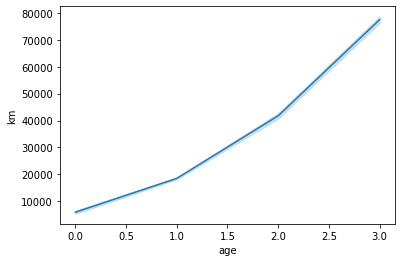

In [557]:
sns.lineplot(data=df, x="age", y="km");

In [558]:
df.groupby("age")["km"].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
0.0,2853.0,5968.111265,17462.062480,1.0,10.0,80.0,3698.0,127022.0
1.0,4522.0,18534.459920,12269.725460,1.0,10000.0,18000.0,25267.0,136000.0
2.0,3273.0,41765.844339,28298.299867,1.0,21550.0,34772.0,54822.0,317000.0
3.0,3674.0,77442.520958,39170.142977,10.0,48000.0,72914.5,99950.0,291800.0


In [559]:
df.groupby("age")["km"].mean()

age
0.0     5968.111265
1.0    18534.459920
2.0    41765.844339
3.0    77442.520958
Name: km, dtype: float64

In [560]:
df.loc[df["age"].isnull(), "km"].values

array([1.000000e+00, 1.000000e+01, 0.000000e+00, ..., 5.000000e+01,
       7.744252e+04, 7.744252e+04])

In [561]:
for km in df.loc[df["age"].isnull(), "km"].values:
    if km <= 2085:
        df.loc[df["age"].isnull(), "age"] = df.loc[df["age"].isnull(), "age"].fillna(0.0)
    elif km >2085  and km < 18035:
        df.loc[df["age"].isnull(), "age"] = df.loc[df["age"].isnull(), "age"].fillna(1.0)
    elif km >= 18035 and km < 41754:
        df.loc[df["age"].isnull(), "age"] = df.loc[df["age"].isnull(), "age"].fillna(2.0)
    else:
        df.loc[df["age"].isnull(), "age"] = df.loc[df["age"].isnull(), "age"].fillna(3.0)

In [562]:
df["age"].isnull().sum()

0

##### 28- upholstery_style column

In [563]:
df["upholstery_style"].value_counts(dropna=False)

Cloth           8423
NaN             4503
Part leather    1499
Full leather    1009
Other            368
Velour            60
alcantara         57
Name: upholstery_style, dtype: int64

In [564]:
df.columns

Index(['make_model', 'body_type', 'price(€)', 'vat', 'km', 'hp(kw)', 'type',
       'previous_owners', 'inspection_new', 'paint_type', 'num_of_door',
       'num_of_seat', 'gearing_type', 'displacement(cc)', 'cylinders',
       'weight(kg)', 'drive_chain', 'fuel', 'co2_emission(g/km)',
       'emission_class', 'comfort_and_convenience', 'entertaintment_and_media',
       'extras', 'safety_and_security', 'gears', 'age', 'upholstery_style',
       'upholstery_color', 'consumption_comb(100km/l)',
       'consumption_city(100km/l)', 'consumption_country(100km/l)',
       'short_description'],
      dtype='object')

In [565]:
upstyle_paintype_freq = pd.crosstab(df["upholstery_style"], df["paint_type"])

In [566]:
upstyle_paintype_freq

paint_type,Metallic,Perl effect,Uni/basic
upholstery_style,,,
Cloth,8050,27,346
Full leather,990,1,18
Other,360,0,8
Part leather,1463,0,36
Velour,56,4,0
alcantara,56,0,1


In [567]:
chi2, pval, dof, expected = stats.chi2_contingency(upstyle_paintype_freq)

In [568]:
chi2

121.72371931164982

In [569]:
upstyle_makemodel_freq = pd.crosstab(df["upholstery_style"], df["make_model"])

In [570]:
upstyle_makemodel_freq

make_model,Audi A1,Audi A2,Audi A3,Opel Astra,Opel Corsa,Opel Insignia,Renault Clio,Renault Duster,Renault Espace
upholstery_style,,,,,,,,,
Cloth,1696,1,1610,1519,1675,956,839,18,109
Full leather,24,0,91,96,1,438,56,0,303
Other,88,0,65,113,21,26,31,0,24
Part leather,118,0,278,228,24,537,136,0,178
Velour,25,0,17,4,11,1,2,0,0
alcantara,17,0,11,11,2,6,7,0,3


In [571]:
chi2, pval, dof, expected = stats.chi2_contingency(upstyle_makemodel_freq)

In [572]:
chi2

3352.7120431688177

In [573]:
upstyle_bodytype_freq = pd.crosstab(df["upholstery_style"], df["body_type"])

In [574]:
upstyle_bodytype_freq

body_type,Compact,Convertible,Coupe,Off-Road,Other,Sedans,Station wagon,Transporter,Van
upholstery_style,,,,,,,,,
Cloth,2198,2,9,22,37,4283,1761,15,96
Full leather,47,0,1,4,4,293,402,6,252
Other,54,0,1,0,9,181,100,0,23
Part leather,167,3,2,5,12,583,571,4,152
Velour,20,0,0,0,3,32,5,0,0
alcantara,10,0,0,1,2,29,13,0,2


In [575]:
chi2, pval, dof, expected = stats.chi2_contingency(upstyle_bodytype_freq)

In [576]:
chi2

1985.4593228992558

In [577]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        condition = (df["make_model"] == makemodel) & (df["body_type"] == bodytype)    
        df.loc[condition, "upholstery_style"] = \
        df.loc[condition, "upholstery_style"].fillna(method="ffill").fillna(method="bfill")

for makemodel in df["make_model"].unique():
    condition = (df["make_model"] == makemodel)
    df.loc[condition, "upholstery_style"] = \
    df.loc[condition, "upholstery_style"].fillna(method="ffill").fillna(method="bfill")
    


In [578]:
df["upholstery_style"].isnull().sum()

0

In [579]:
df["upholstery_style"].value_counts(dropna=False)

Cloth           11719
Part leather     2054
Full leather     1420
Other             554
alcantara          95
Velour             77
Name: upholstery_style, dtype: int64

##### 29- upholstery_color column

In [580]:
df["upholstery_color"].value_counts(dropna=False)

Black     8201
NaN       5078
Grey      1376
Other      960
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: upholstery_color, dtype: int64

In [581]:
df.columns

Index(['make_model', 'body_type', 'price(€)', 'vat', 'km', 'hp(kw)', 'type',
       'previous_owners', 'inspection_new', 'paint_type', 'num_of_door',
       'num_of_seat', 'gearing_type', 'displacement(cc)', 'cylinders',
       'weight(kg)', 'drive_chain', 'fuel', 'co2_emission(g/km)',
       'emission_class', 'comfort_and_convenience', 'entertaintment_and_media',
       'extras', 'safety_and_security', 'gears', 'age', 'upholstery_style',
       'upholstery_color', 'consumption_comb(100km/l)',
       'consumption_city(100km/l)', 'consumption_country(100km/l)',
       'short_description'],
      dtype='object')

In [582]:
upcolor_paintype_freq = pd.crosstab(df["upholstery_color"], df["paint_type"])

In [583]:
upcolor_paintype_freq

paint_type,Metallic,Perl effect,Uni/basic
upholstery_color,,,
Beige,51,0,3
Black,7919,6,276
Blue,14,0,2
Brown,201,0,6
Grey,1250,25,101
Orange,1,0,0
Other,931,0,29
Red,9,0,0
White,11,0,2


In [584]:
chi2, pval, dof, expected = stats.chi2_contingency(upcolor_paintype_freq)

In [585]:
chi2

192.94663920544488

In [586]:
upcolor_upstyle_freq = pd.crosstab(df["upholstery_color"], df["upholstery_style"])

In [587]:
upcolor_upstyle_freq

upholstery_style,Cloth,Full leather,Other,Part leather,Velour,alcantara
upholstery_color,,,,,,
Beige,13,36,0,5,0,0
Black,6190,631,124,1172,36,48
Blue,14,2,0,0,0,0
Brown,31,120,1,55,0,0
Grey,1096,90,21,151,8,10
Orange,1,0,0,0,0,0
Other,639,72,182,65,0,2
Red,5,1,0,3,0,0
White,9,1,0,3,0,0


In [588]:
chi2, pval, dof, expected = stats.chi2_contingency(upcolor_upstyle_freq)

In [589]:
chi2

2016.8287194717727

In [590]:
upcolor_makemodel_freq = pd.crosstab(df["upholstery_color"], df["make_model"])

In [591]:
upcolor_makemodel_freq

make_model,Audi A1,Audi A2,Audi A3,Opel Astra,Opel Corsa,Opel Insignia,Renault Clio,Renault Duster,Renault Espace
upholstery_color,,,,,,,,,
Beige,0,0,2,6,0,31,0,0,15
Black,1533,1,1473,1420,1291,1570,708,2,203
Blue,7,0,2,1,3,1,0,0,2
Brown,0,0,14,1,1,8,0,0,183
Grey,246,0,312,165,212,161,197,16,67
Orange,1,0,0,0,0,0,0,0,0
Other,133,0,222,216,86,163,79,0,61
Red,4,0,0,0,0,0,5,0,0
White,1,0,2,1,3,1,2,0,3


In [592]:
chi2, pval, dof, expected = stats.chi2_contingency(upcolor_makemodel_freq)

In [593]:
chi2

3671.5455104160005

In [594]:
upcolor_bodytype_freq = pd.crosstab(df["upholstery_color"], df["body_type"])

In [595]:
upcolor_bodytype_freq

body_type,Compact,Convertible,Coupe,Off-Road,Other,Sedans,Station wagon,Transporter,Van
upholstery_color,,,,,,,,,
Beige,1,0,0,0,2,15,23,0,13
Black,2039,2,11,8,65,3815,2081,5,175
Blue,3,0,0,0,0,8,3,0,2
Brown,1,1,0,1,2,20,19,5,158
Grey,259,0,0,20,11,752,292,6,36
Orange,0,0,0,0,0,1,0,0,0
Other,146,1,2,0,0,505,254,0,52
Red,0,0,0,0,0,6,3,0,0
White,0,0,0,0,0,6,2,5,0


In [596]:
chi2, pval, dof, expected = stats.chi2_contingency(upcolor_bodytype_freq)

In [597]:
chi2

4237.409813742361

In [598]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        condition = (df["make_model"] == makemodel) & (df["body_type"] == bodytype)    
        df.loc[condition, "upholstery_color"] = \
        df.loc[condition, "upholstery_color"].fillna(method="ffill").fillna(method="bfill")


for bodytype in df["body_type"].unique():
    condition = (df["body_type"] == bodytype)
    df.loc[condition, "upholstery_color"] = \
    df.loc[condition, "upholstery_color"].fillna(method="ffill").fillna(method="bfill")    

In [599]:
df["upholstery_color"].isnull().sum()

0

##### 30- consumption_comb(100km/l) column

In [600]:
df.columns

Index(['make_model', 'body_type', 'price(€)', 'vat', 'km', 'hp(kw)', 'type',
       'previous_owners', 'inspection_new', 'paint_type', 'num_of_door',
       'num_of_seat', 'gearing_type', 'displacement(cc)', 'cylinders',
       'weight(kg)', 'drive_chain', 'fuel', 'co2_emission(g/km)',
       'emission_class', 'comfort_and_convenience', 'entertaintment_and_media',
       'extras', 'safety_and_security', 'gears', 'age', 'upholstery_style',
       'upholstery_color', 'consumption_comb(100km/l)',
       'consumption_city(100km/l)', 'consumption_country(100km/l)',
       'short_description'],
      dtype='object')

In [601]:
condition =(df["consumption_comb(100km/l)"].isnull()) \
& (df["consumption_country(100km/l)"].notnull()) & (df["consumption_city(100km/l)"].notnull())

In [602]:
df.loc[condition, ["consumption_comb(100km/l)", "consumption_city(100km/l)", "consumption_country(100km/l)"]]

,consumption_comb(100km/l),consumption_city(100km/l),consumption_country(100km/l)
673,NaN,5.2,3.9
2622,NaN,3.5,3.8
2627,NaN,3.5,3.8
2630,NaN,3.4,3.8
2674,NaN,3.4,3.8
...,...,...,...
14982,NaN,5.0,4.4
14983,NaN,5.0,4.4
15543,NaN,5.0,4.4
15558,NaN,5.0,4.4


In [603]:
mean_of_city_and_country = (df["consumption_city(100km/l)"] + df["consumption_country(100km/l)"]) / 2

In [604]:
df.loc[condition, "consumption_comb(100km/l)"] = df.loc[condition, "consumption_comb(100km/l)"].fillna(mean_of_city_and_country)

In [605]:
df["consumption_comb(100km/l)"].isnull().sum()

1925

<AxesSubplot:>

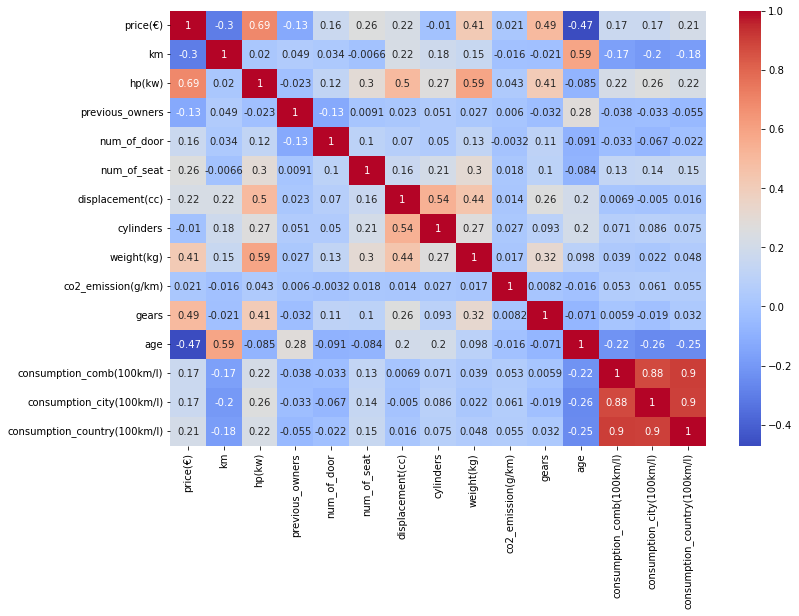

In [606]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")

In [607]:
df.columns

Index(['make_model', 'body_type', 'price(€)', 'vat', 'km', 'hp(kw)', 'type',
       'previous_owners', 'inspection_new', 'paint_type', 'num_of_door',
       'num_of_seat', 'gearing_type', 'displacement(cc)', 'cylinders',
       'weight(kg)', 'drive_chain', 'fuel', 'co2_emission(g/km)',
       'emission_class', 'comfort_and_convenience', 'entertaintment_and_media',
       'extras', 'safety_and_security', 'gears', 'age', 'upholstery_style',
       'upholstery_color', 'consumption_comb(100km/l)',
       'consumption_city(100km/l)', 'consumption_country(100km/l)',
       'short_description'],
      dtype='object')

<AxesSubplot:xlabel='make_model', ylabel='consumption_comb(100km/l)'>

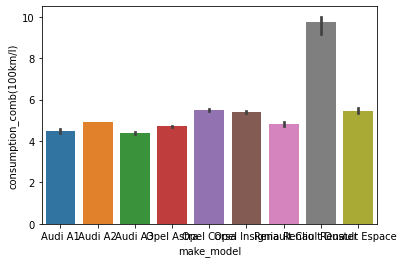

In [608]:
sns.barplot(data=df, x="make_model", y="consumption_comb(100km/l)")

<AxesSubplot:xlabel='fuel', ylabel='consumption_comb(100km/l)'>

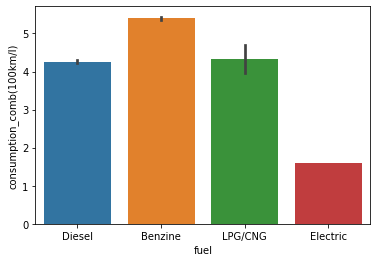

In [609]:
sns.barplot(data=df, x="fuel", y="consumption_comb(100km/l)")

<AxesSubplot:xlabel='body_type', ylabel='consumption_comb(100km/l)'>

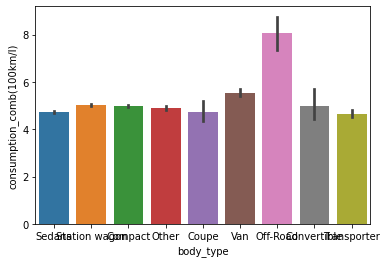

In [610]:
sns.barplot(data=df, x="body_type", y="consumption_comb(100km/l)")

<AxesSubplot:xlabel='hp(kw)', ylabel='consumption_comb(100km/l)'>

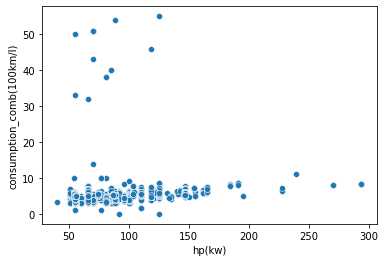

In [611]:
sns.scatterplot(data=df, x="hp(kw)", y="consumption_comb(100km/l)")

In [612]:
df["hp(kw)"].corr(df["consumption_comb(100km/l)"])

0.217474451277255

<AxesSubplot:xlabel='consumption_comb(100km/l)', ylabel='displacement(cc)'>

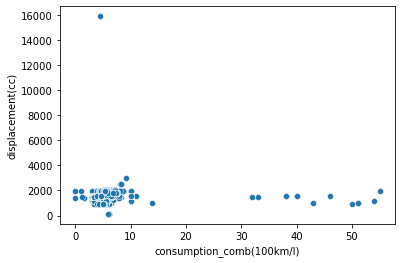

In [613]:
sns.scatterplot(data=df, x="consumption_comb(100km/l)", y="displacement(cc)")

In [614]:
df["consumption_comb(100km/l)"].corr(df["displacement(cc)"])

0.006868449475317003

In [615]:
for makemodel in df["make_model"].unique():
    for fueltype in df["fuel"].unique():
        for bodytype in df["body_type"].unique():
            condition =  (df["make_model"] == makemodel) & (df["fuel"]==fueltype) & (df["body_type"] == bodytype)
            median = df[condition]["consumption_comb(100km/l)"].median()    
            df.loc[condition, "consumption_comb(100km/l)"] = \
            df.loc[condition, "consumption_comb(100km/l)"].fillna(median)
                
for makemodel in df["make_model"].unique():
    for fueltype in df["fuel"].unique():
        condition =  (df["make_model"] == makemodel) & (df["fuel"]==fueltype)
        median = df[condition]["consumption_comb(100km/l)"].median()    
        df.loc[condition, "consumption_comb(100km/l)"] = \
        df.loc[condition, "consumption_comb(100km/l)"].fillna(median)
        
df["consumption_comb(100km/l)"] = df["consumption_comb(100km/l)"].fillna(method="ffill").fillna(method="bfill")

In [616]:
df["consumption_comb(100km/l)"].isnull().sum()

0

##### 31- consumption_city(100km/l) column

In [617]:
# I won't use this column for analysis.

##### 32- consumption_country(100km/l) column

In [618]:
# I won't use this column for analysis.

In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   make_model                    15919 non-null  object 
 1   body_type                     15919 non-null  object 
 2   price(€)                      15919 non-null  int64  
 3   vat                           15919 non-null  object 
 4   km                            15919 non-null  float64
 5   hp(kw)                        15919 non-null  float64
 6   type                          15919 non-null  object 
 7   previous_owners               15919 non-null  float64
 8   inspection_new                15919 non-null  object 
 9   paint_type                    15919 non-null  object 
 10  num_of_door                   15919 non-null  float64
 11  num_of_seat                   15919 non-null  float64
 12  gearing_type                  15919 non-null  object 
 13  d

In [620]:
df.drop(columns=["consumption_city(100km/l)", "consumption_country(100km/l)", "short_description"], inplace=True)

In [621]:
df.isnull().sum()

make_model                   0
body_type                    0
price(€)                     0
vat                          0
km                           0
hp(kw)                       0
type                         0
previous_owners              0
inspection_new               0
paint_type                   0
num_of_door                  0
num_of_seat                  0
gearing_type                 0
displacement(cc)             0
cylinders                    0
weight(kg)                   0
drive_chain                  0
fuel                         0
co2_emission(g/km)           0
emission_class               0
comfort_and_convenience      0
entertaintment_and_media     0
extras                       0
safety_and_security          0
gears                        0
age                          0
upholstery_style             0
upholstery_color             0
consumption_comb(100km/l)    0
dtype: int64

In [622]:
df.to_csv("auto_scout_filled.csv", index=False)